# 第22讲 数组数据可视化(二)
等值(高)线图，密度图，三维曲面图，...

5步画出等值(等高)线图

对于分布在三维空间上的数据，可以投影到x-y平面，并用线条和颜色来表示数据相对于x-y的高度，高度相同的数据颜色相同或位于同一等高线上。这是三维数据二维化的可视化方案。是否有用，你自己判决。画等值图步骤：
 1. 导入相应模块：产生数据模块、画图模块
 2. 装入或创建数据
 3. 选择画图函数并调用函数画图
 4. 适当修饰图形
 5. 推图到屏幕

## 画等值线和密度图

pc=plt.contour画等值线图
pf=plt.contourf 画密度图

C:\Anaconda3\envs\PythonLearn\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'colormap'
  import sys
C:\Anaconda3\envs\PythonLearn\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'colormap'
  


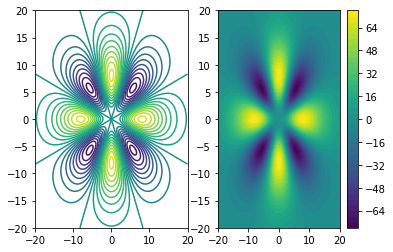

In [1]:
from matplotlib import pyplot as plt
npp=plt.np;pc=plt.contour;pf=plt.contourf
def  f(x,y):
    return (x**4-6*(x*y)**2+y**4)*npp.exp(-0.5*(x**2+y**2)**0.5)
x,y=npp.mgrid[-20:20:200j,-20:20:200j]; z=f(x,y)
line_n=20
plt.subplot(121);pc(x,y,z,line_n,colormap='jet')
plt.subplot(122);pf(x,y,z,40,colormap='autummn')
plt.colorbar()
plt.show()

## 四步在图中显示汉字：
1. 选字库
2. 设置负号
3. 设字号
4. 用中文标注

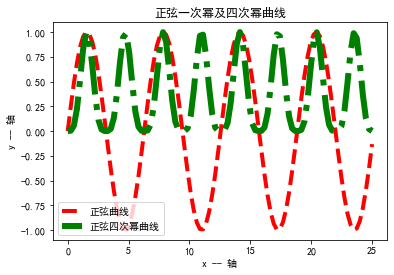

In [2]:
# Python默认并不能在图形窗上显示汉字，要显示汉字需要专门的设置：
from matplotlib import pyplot as plt;
plt.rcParams['font.sans-serif']=['SimHei'] # 选字库，也可以是Simsun或 KaiTi或...
plt.rcParams['axes.unicode_minus']=False#坐标轴上的负号使用单字节编码plt.rcParams['font.size']=18;#设字号
x=plt.np.linspace(0,25,100);y1=plt.np.sin(x);y2=y1**4#准备数据
plt.plot(x,y1,'r--',lw=4);plt.plot(x,y2,'g-.',lw=6);#画曲线
plt.legend(['正弦曲线','正弦四次幂曲线'])#修饰图
plt.xlabel('x -- 轴');plt.ylabel('y -- 轴');
plt.title('正弦一次幂及四次幂曲线')
plt.show()#推图到屏幕

## 图形存盘的三种方法：

1. 存画图程序
2. 存内存图形数据
3. 存图形窗口



1. 把画图程序代码存为*.py文件，需要图时运行程序重新画图，优点是便于修改，灵活性强。

2. 在Python运行环境，每当执行了画图程序后，调用

   plt.savefig('文件主名.png',dpi=80)
   
存盘，需要时再次导入图形可调用

  pic=plt.imread('文件主名.png'）
  plt.imshow(pic);plt.show()
  
命令将图形显示于屏幕上

3. 在Python环境画图，并推图到屏幕后，可点击图形窗口左下角的存盘图标，并回答存放格式、存放路径，为图形文件命名，也能保存图形到磁盘文件。


## 平面向量图：用于直观显示有方向有大小的数据

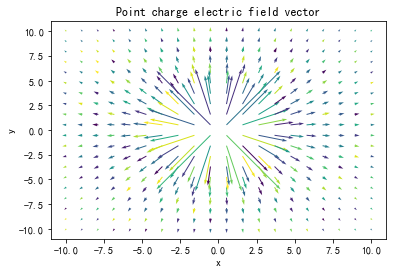

In [5]:
from matplotlib import pyplot as plt;
npp=plt.np
x,y=npp.mgrid[-10:10:20j,-10:10:20j];
L=len(x);
c=npp.random.random((L,L))
r=npp.sqrt(x**2+y**2)+1;r3=r**3
X,Y=x/r3,y/r3
plt.quiver(x,y,X,Y,c);
plt.title('Point charge electric field vector') ;
plt.xlabel('x');
plt.ylabel('y')
plt.savefig('平面向量场.png',dpi=300)
plt.show()


## 多幅图同窗口：以便于比较寻找异同点

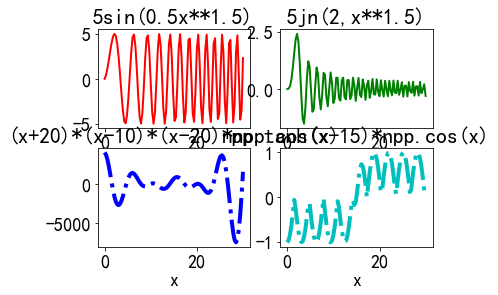

In [6]:
#encoding=gb2312
#plt.subplot(n,m,k)将一个图形窗口分割成n*m个,并将画图位置移到第k个子窗口.
from matplotlib import pyplot as plt;
from scipy.special import jn
npp=plt.np;
pp=plt.plot;
ps=plt.subplot;
x=npp.linspace(0,30,100)
y1=5*npp.sin(0.5*x**1.5);y2=5*jn(2,x**1.5)
y3=(x+20)*(x-10)*(x-20)*npp.cos(x)
y4=npp.tanh(x-15)*abs(npp.cos(x))
plt.rcParams['font.size']=18
ps(2,2,1);pp(x,y1,'r',lw=2);plt.title('5sin(0.5x**1.5)');
ps(2,2,2);pp(x,y2,'g',lw=2);plt.title('5jn(2,x**1.5)');
ps(2,2,3);pp(x,y3,'b-.',lw=4);plt.title('(x+20)*(x-10)*(x-20)*npp.cos(x)');plt.xlabel('x')
ps(2,2,4);pp(x,y4,'c-.',lw=4);plt.title('npp.tanh(x-15)*npp.cos(x)');plt.xlabel('x')
plt.show()


## 2D数据的直接可视化函数imshow：

依据图的颜色确定数据大小的变化趋势

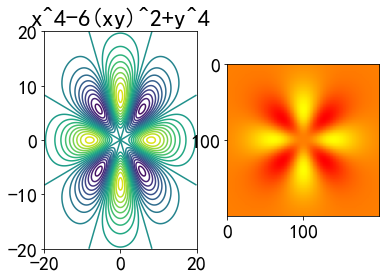

In [7]:
from matplotlib import pyplot as plt;
npp=plt.np;pw=plt.imshow;a=20;
x,y=npp.mgrid[-a:a:200j,-a:a:200j]
z1=(x**4-6*(x*y)**2+y**4)
z=z1*npp.exp(-0.5*(x**2+y**2)**0.5)
plt.rcParams['font.size']=20
plt.subplot(121);
plt.contour(x,y,z,20)
plt.title('x^4-6(xy)^2+y^4')
plt.subplot(122);
pw(z,cmap='autumn')
plt.show()

## 5步调用matplotlib画出2~3D数据的三维曲面图

1.  导入画图模块
```
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import pyplot as plt;npp=plt.np
```
2. 创建图形窗口取得图形窗口坐标轴 fig=plt.figure();ax=Axes3D(fig)
3. 准备二维坐标网格数据、计算每个格点上的画图函数值 z=f(x,y)
```
x,y=npp.mgrid[-16:16:100j,-16:16:100j];r=npp.sqrt(x**2+y**2)
z=(x**4-6*(x*y)**2+y**4)*npp.exp(-0.2*r)
```
4. 调用ax的函数contour3D contourf3D plot3D plot_surface plot_trisurf plot_wireframe quiver3D scatter3D streamplot画图

5. 推图到屏幕  plt.show()


## 用2D数据画出的三维曲面


C:\Anaconda3\envs\PythonLearn\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride'
  if sys.path[0] == '':


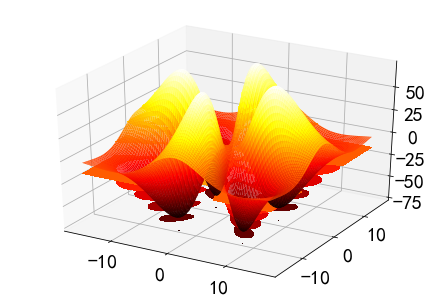

In [9]:
from matplotlib import pyplot as plt;
npp=plt.np
from mpl_toolkits.mplot3d import Axes3D
plt.close()
ax=Axes3D(plt.figure())
x,y=npp.mgrid[-16:16:100j,-16:16:100j];
r=npp.sqrt(x**2+y**2)
z1=x**4-6*(x*y)**2+y**4
z=z1*npp.exp(-0.5*r)
dc=dict(rstride=1,cstride=1,cmap='hot')
ax.plot_surface(x,y,z,**dc)
ax.contourf(x,y,z,10,**dc)
plt.show()

## 网状曲面图

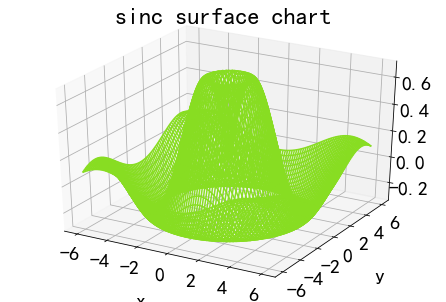

In [13]:
from mpl_toolkits.mplot3d import Axes3D;
from matplotlib import pyplot as plt
import numpy as np
ax = Axes3D(plt.figure())
x,y= plt.np.mgrid[-6:6:80j,-6:6:80j];
r=plt.np.sqrt(x**2+y**2)
z = plt.np.sin(r)*np.exp(-r/4)
dc=dict(rstride=1,cstride=1,color='#88dd22')
plt.rcParams['font.size']=20
ax.plot_wireframe(x, y, z, **dc)
plt.xlabel('x',labelpad=20);
plt.ylabel('y',labelpad=20)
plt.title('sinc surface chart')
plt.show()

## 三维散点图

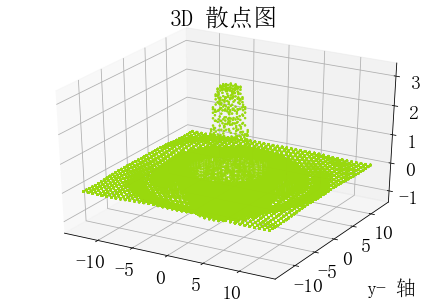

In [15]:
#cncoding=gb2312
from matplotlib import pyplot as plt;npp=plt.np
from mpl_toolkits.mplot3d import Axes3D;
plt.rcParams['font.size']=20
plt.rcParams['font.sans-serif']=['Simsun','KaiTi']
plt.rcParams['axes.unicode_minus']=False
ax=Axes3D(plt.figure())
x,y,z=npp.mgrid[-13:13:40j,-13:13:40j,-5:5:40j];
r=npp.sqrt(x**2+y**2+z**2);
z=5*npp.sin(r)*npp.exp(-r/3)
ax.scatter3D(x,y,z,s=2,color=[0.6,0.85,0.05])
plt.xlabel('x- 轴',labelpad=30);
plt.ylabel('y- 轴',labelpad=30)
plt.title('3D 散点图')
plt.show()


## 三维向量场

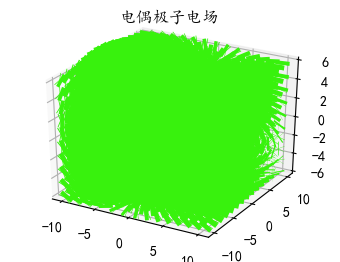

In [29]:
# encoding=gb2312
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

npp=plt.np
plt.close()

ax=Axes3D(plt.figure(figsize=(3.2,2.4),dpi=100))
x,y,z=npp.mgrid[-10:10:15j,-10:10:15j,-6:6:10j]

r1=2+npp.sqrt((x+5)**2+y**2+z**2)
r2=2+npp.sqrt((x-5)**2+y**2+z**2)

u=10*(x+5)/r1**3-5*(x-5)/r2**3
v=10*y*(1/r1**3-1/r2**3)
w=10*z*(1/r1**3-1/r2**3)

zk=['SimSun','KaiTi','SimHei']

plt.rcParams['font.sans-serif']=zk[1]
plt.rcParams['font.size']=10
plt.rcParams['axes.unicode_minus']=False
cc=[0.22,0.95,0.05]
dc=dict(length=20,arrow_length_ratio=0.2,lw=10,color=cc)
ax.quiver3D(x,y,z,u,v,w,**dc)

plt.xlabel('u- 轴',labelpad=150)
plt.ylabel('v- 轴',labelpad=150)

plt.title('电偶极子电场')

plt.show()
